1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

2 Importing the dataset

In [2]:
zomato_df=pd.read_csv("Zomato Chennai Listing 2020.csv")

In [3]:
zomato_df

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
...,...,...,...,...,...,...,...,...,...,...,...,...
12027,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12028,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12029,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"
12030,https://www.zomato.com/chennai/cks-sandwiches-...,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,NaN,NaN,NaN,NaN,"['Breakfast', 'Delivery Only']"


3. Getting Basic Information about the Dataset

In [4]:
zomato_df.shape

(12032, 12)

In [5]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


4. Cleaning the Dataset

a.Removing the Null Records

In [6]:
zomato_df.isnull().sum()

Zomato URL                  0
Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [7]:
zomato_df.fillna('NA', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2188\1703275999.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [8]:
zomato_df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

b.Dropping columns which are not required for further analysis

In [9]:
# Dropping columns which are not required for further analysis
zomato_df.drop(['Zomato URL'], axis = 1, inplace=True)

In [10]:
#replace the missin value witch centrol tendency mean median mode
zomato_df["Dining Rating"].fillna(zomato_df["Dining Rating"].mode(),inplace=True)
zomato_df["Delivery Rating"].fillna(zomato_df["Delivery Rating"].mode(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2188\2115866113.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\user\AppData\Local\Temp\ipykernel_2188\2115866113.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

c. Converting the DataTypes of numerical columns to numeric datatype

In [11]:
zomato_df['Delivery Rating Count'].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
NA                              220
27                               34
37                               30
                               ... 
3530                              1
7705                              1
6374                              1
1773                              1
1617                              1
Name: count, Length: 2282, dtype: int64

In [12]:
# Replacing the text values with '0'
zomato_df['Dining Rating'].replace(to_replace=['-','NA','NaN'], value='0', inplace=True)
zomato_df['Delivery Rating'].replace(to_replace=['-','NA','NaN'], value='0', inplace=True)
zomato_df['Dining Rating Count'].replace(to_replace=['-','NA','NaN','Does not offer Dining','Not enough Dining Reviews'], value='0', inplace=True)

# Changing Data Type of the numerical columns

zomato_df['Dining Rating'] = zomato_df['Dining Rating'].astype('float64')
zomato_df['Delivery Rating'] = zomato_df['Delivery Rating'].astype('float64')
zomato_df['Dining Rating Count'] = zomato_df['Dining Rating Count'].astype('float64')
zomato_df['Delivery Rating Count'] = zomato_df['Dining Rating Count'].astype('float64')

C:\Users\user\AppData\Local\Temp\ipykernel_2188\3877587338.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\user\AppData\Local\Temp\ipykernel_2188\3877587338.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

d.Removing the restaurant records whose Rating  is 0

In [13]:
Dininguseless_data = (zomato_df['Dining Rating'] == 0.0)
zomato_df[Dininguseless_data]

Deliveryuseless_data = (zomato_df['Delivery Rating'] == 0.0)
zomato_df[Deliveryuseless_data]

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
15,Welcome Hotel,"112/241, Purasawalkam High Road, Purasavakkam...",Purasavakkam,"['South Indian', ' Desserts', ' Beverages']","['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...",300.0,4.5,1094.0,0.0,1094.0,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."
18,Wire Room Bar & Kitchen,"142, Phoenix Marketcity, New NGO Colony, Vela...","Phoenix Market City, Velachery","['Continental', ' Asian']","['Cocktails', ' Salad', ' Beer', ' Tikka', ' P...",2000.0,4.1,354.0,0.0,354.0,"['Full Bar Available', 'Mall Parking', 'Dance ..."
23,BFF 2.0,"80/29, 2nd Main Road, RA Puram, Chennai",RA Puram,"['North Indian', ' Continental', ' Italian']","['Crispy Chicken', ' Cocktails', ' Pizza', ' N...",1500.0,4.2,464.0,0.0,464.0,"['Full Bar Available', 'Indoor Seating', 'Nigh..."
85,Bazaar - All Day Diner - Grand by GRT Hotels,"Grand by GRT Hotels, 120, Sir Thyagaraya Road...",Grand by GRT Hotels,"['North Indian', ' South Indian', ' Continenta...","['Pizza', ' Pasta', ' Fish', ' Chaat', ' Momos...",2500.0,4.4,1198.0,0.0,1198.0,"['Breakfast', 'Home Delivery', 'Serves Alcohol..."
89,Coal Barbecues,"Shop 17 & 18, Rajalakshmi Nagar, 7th Cross St...",Velachery,"['North Indian', ' Chinese']","['Chicken Honey', ' Fish', ' Prawn', ' Waffles...",1400.0,4.4,9410.0,0.0,9410.0,"['Indoor Seating', 'Buffet', 'Table reservatio..."
...,...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350.0,0.0,0.0,0.0,0.0,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350.0,0.0,0.0,0.0,0.0,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350.0,0.0,0.0,0.0,0.0,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350.0,0.0,0.0,0.0,0.0,"['Breakfast', 'Delivery Only']"


In [14]:
zomato_df = zomato_df[~Dininguseless_data]

In [15]:
zomato_df = zomato_df[~Deliveryuseless_data]

C:\Users\user\AppData\Local\Temp\ipykernel_2188\1920098540.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



e.Working on 'Location' Column

In [16]:
zomato_df['Location'].value_counts()

Location
Porur                                      148
Anna Nagar East                            146
Velachery                                  145
Ambattur                                   124
T. Nagar                                   119
                                          ... 
Holiday Inn Chennai OMR IT Expressway        1
Chennai Food Town, Thuraipakkam              1
Foodies Kitchen                              1
Hotel Bhimaas, Vadapalani                    1
Spectrum The Grand Venus Mall, Perambur      1
Name: count, Length: 161, dtype: int64

In [17]:
# Removing the irrelevant text from the Region column
zomato_df['Location'] = zomato_df['Location'].str.replace('[a-zA-Z].+-- ','',regex=True)

# Removing the West & East from the Region column
zomato_df['Location'] = zomato_df['Location'].str.replace(' West| west| East| east','',regex=True)

zomato_df['Location'].value_counts()


Location
Anna Nagar                                            238
Porur                                                 148
Velachery                                             145
Ambattur                                              124
T. Nagar                                              119
                                                     ... 
Fairfield by Marriot, Chengalpattu                      1
Gokulam Park Sabari - OMR, Old Mahabalipuram Road       1
Chennai Food Town, Thuraipakkam                         1
Grand Residence Hotel, Porur                            1
Spectrum The Grand Venus Mall, Perambur                 1
Name: count, Length: 160, dtype: int64

4. Performing Exploratory Data Analysis

Q1) How many restaurants are there in Chennai for each cuisine?

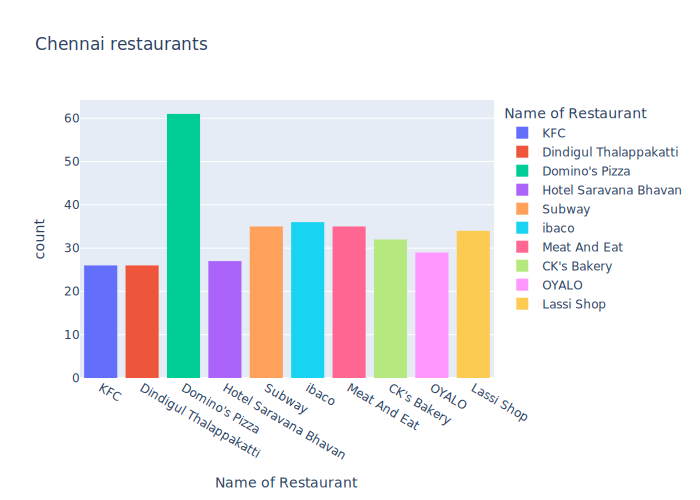

In [18]:
restaurants = zomato_df['Name of Restaurant'].value_counts().nlargest(10).index
zomatoch = zomato_df[zomato_df['Name of Restaurant'].isin(restaurants)]

fig = px.histogram(zomatoch, x='Name of Restaurant',  color='Name of Restaurant',  title='Chennai  restaurants', labels={'Cuisine': 'Cuisine Type'})

fig.show()

Q2) What are the percentage of restaurants by Dining Rating  in Chennai?

In [19]:
Dining_rating_df = zomato_df['Dining Rating'].value_counts().reset_index()
Dining_rating_df.rename(columns={'count':'COUNT OF RESTAURANTS' , 'Dining Rating':'RATING'}, inplace=True)
Dining_rating_df

,RATING,COUNT OF RESTAURANTS
0,3.7,387
1,3.6,377
2,3.5,359
3,3.8,334
4,3.4,324
5,3.9,301
6,3.3,294
7,3.2,262
8,3.1,236
9,4.0,222


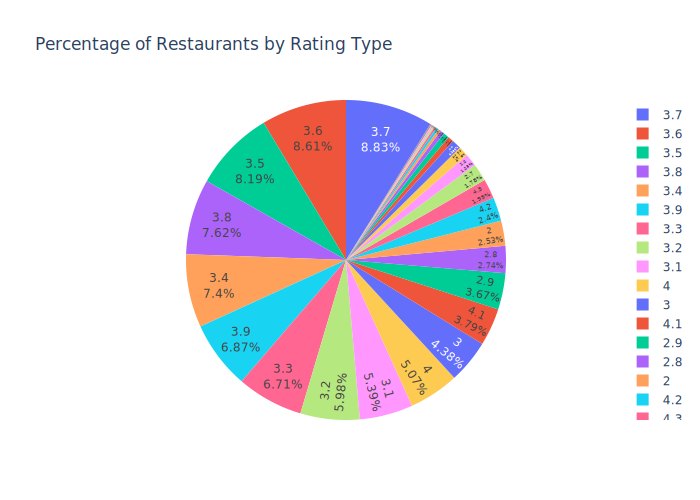

In [20]:
fig = px.pie(Dining_rating_df, names='RATING', values='COUNT OF RESTAURANTS', color='RATING',
         title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Q3) Which are the Top 10 highest rated Seafood Restaurant in Chennai?

In [21]:
seafood_df = zomato_df[zomato_df['Cuisine'].str.contains('Seafood')]
seafood_df.sort_values(by='Dining Rating',ascending=False).head(10)

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
195,The Marina,"39, College Road, Nungambakkam, Chennai",Nungambakkam,"['Seafood', ' North Indian', ' Chinese']","['Sea Food', ' Jumbo Prawns', ' Biryani', ' Fi...",1600.0,4.8,1082.0,4.3,1082.0,"['Home Delivery', 'Indoor Seating', 'Table res..."
214,Sera - The Tapas Bar & Restaurant,"71, Cathedral Road, Gopalapuram, Chennai",Gopalapuram,"['Finger Food', ' Seafood', ' Italian', ' Cont...","['Cocktails', ' Pasta', ' Nachos', ' Mashed Po...",1600.0,4.5,964.0,3.4,964.0,"['Home Delivery', 'Full Bar Available', 'Free ..."
315,Layalee,"12A, Near Jaya TV Signal, Jawaharlal Nehru Ro...",Ekkaduthangal,"['Arabian', ' BBQ', ' Seafood', ' Chinese', ' ...","['Fish', ' Faluda', ' Shawarma', ' Brownie', '...",700.0,4.4,586.0,4.1,586.0,"['Home Delivery', 'Table booking recommended',..."
96,Urban Spatula,"Plot 1633, 54, H-Block, Ground Floor, 13th Ma...",Anna Nagar,"['Continental', ' Seafood', ' Biryani', ' Ital...","['Burgers', ' Pasta', ' Fish', ' Fries', ' Chi...",800.0,4.4,794.0,4.3,794.0,"['Home Delivery', 'Free Parking', 'Table booki..."
14,Hotel Paramount,"12/5, Ormes Road, Kilpauk, Chennai",Kilpauk,"['North Indian', ' Chinese', ' Seafood', ' Sou...","['Biryani', ' Butter Chicken', ' Tandoori Chic...",500.0,4.3,1266.0,4.2,1266.0,"['Breakfast', 'Home Delivery', 'Indoor Seating..."
133,Azzuri Bay,"13, 1st Crescent Road, Gandhinagar, Adyar, Ch...",Adyar,"['Italian', ' Mediterranean', ' Thai', ' Seafo...","['Pasta', ' Pizza', ' Sea Food', ' Tiramisu', ...",1000.0,4.3,2430.0,4.0,2430.0,"['Home Delivery', 'Rooftop', 'Table reservatio..."
9027,Copper Kitchen,"19B,Gandhi Mandapam Road, Opposite Anna Cente...",Kotturpuram,"['North Indian', ' Chinese', ' Chettinad', ' S...","['Brownie', ' Faluda', ' Biryani', ' Bbq Chick...",1000.0,4.3,1739.0,3.7,1739.0,"['Home Delivery', 'Indoor Seating', 'Table boo..."
9026,Copper Kitchen,"6/133, Arcot Road, Near Porur Signal, Porur, ...",Porur,"['North Indian', ' Chinese', ' Chettinad', ' S...","['Faluda', ' Bbq Chicken', ' Brownie', ' Birya...",1000.0,4.3,5073.0,3.9,5073.0,"['Home Delivery', 'Sports TV', 'Indoor Seating..."
237,The Cascade,"1632, Platinum Tower, Khader Nawaz Khan Road,...",Nungambakkam,"['Seafood', ' Chinese', ' Asian', ' Thai', ' M...","['Momos', ' Phuket Fish', ' Dragon Chicken', '...",1000.0,4.3,613.0,4.1,613.0,"['Home Delivery', 'Wheelchair Accessible', 'Va..."
153,The Bayleaf,"14, 6th Street, Gopalapuram, Chennai",Gopalapuram,"['Mughlai', ' North Indian', ' Seafood', ' Bir...","['Rolls', ' Fish', ' Kathi Roll', ' Biryani', ...",800.0,4.3,542.0,4.0,542.0,"['Home Delivery', 'Indoor Seating', 'Wifi', 'T..."


Q4) Which is the best Fast Food  in Chennai?

In [22]:
Fast_Food_df = zomato_df[zomato_df['Cuisine'].str.contains('Fast Food')]
Fast_Food_df.sort_values(by='Dining Rating',ascending=False).head(2)

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
155,The Sandwich Shop,"1, Subba Street, West Mambalam, Chennai",West Mambalam,"['Sandwich', ' Fast Food', ' Beverages']","['Mocktails', ' Fries', ' Pizza Sandwich', ' T...",300.0,4.9,584.0,4.4,584.0,"['Home Delivery', 'Vegetarian Only', 'Bulk Ord..."
75,Fusilli Reasons,"2/64, Ormes Main Road, Kilpauk, Chennai",Kilpauk,['Fast Food'],"['Nachos', ' Iced Tea', ' Garlic Bread', ' Bro...",400.0,4.7,3042.0,4.4,3042.0,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."


 Which places have the highest rated restaurant for each Cuisine in Chennai?

In [23]:
# Assuming restaurants having rating above 4.9
highest_rated_df = zomato_df[zomato_df['Dining Rating'] >= 4.9]
highest_rated_df

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
57,Brownie Heaven,"193, Peters Road, Opposite New College, Royap...",Royapettah,"['Bakery', ' Desserts', ' Beverages']","['Vanilla Ice Cream', ' Brownie Shake', ' Filt...",350.0,4.9,842.0,4.3,842.0,"['Home Delivery', 'Indoor Seating', 'Desserts ..."
105,Bhangra,"Mayajaal Multiplex, Kanathur, Chennai","Mayajaal Multiplex, Kanathur",['North Indian'],"['Butter Chicken', ' Dal Makhani', ' Sweet Las...",800.0,4.9,2109.0,4.0,2109.0,"['Breakfast', 'Home Delivery', 'Mall Parking',..."
155,The Sandwich Shop,"1, Subba Street, West Mambalam, Chennai",West Mambalam,"['Sandwich', ' Fast Food', ' Beverages']","['Mocktails', ' Fries', ' Pizza Sandwich', ' T...",300.0,4.9,584.0,4.4,584.0,"['Home Delivery', 'Vegetarian Only', 'Bulk Ord..."
184,Gossip Fusion Bistro,"New 141, Old 191, Opposite HP Fuel Station, E...",Kanathur,"['Italian', ' Continental', ' Burger', ' Sandw...","['Tender Coconut Mousse', ' Iced Tea', ' Pasta...",1500.0,4.9,996.0,4.3,996.0,"['Breakfast', 'Home Delivery', 'Free Parking',..."
192,Kabab Corner,"12/1, Opposite Royal Enfield Showroom, Egmore...",Egmore,"['Kebab', ' Rolls', ' Mughlai']","['Rolls', ' Beef Fry', ' Beef Steak', ' Chicke...",450.0,4.9,1053.0,4.3,1053.0,"['Home Delivery', 'Indoor Seating', 'Catering ..."
219,Prems Graama Bhojanam,"23/10, 3rd Main Road, Kasturba Nagar, Adyar, ...",Adyar,['South Indian'],"['Benne Dosa', ' Buttermilk', ' Thatte Idli', ...",500.0,4.9,1511.0,4.1,1511.0,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
320,Bombay Kulfi,"4/2, 10th Cross Street, Indira Nagar, Adyar, ...",Adyar,['Ice Cream'],"['Kesar Pista Kulfi', ' Malai Kulfi', ' Chocol...",200.0,4.9,534.0,4.3,534.0,"['Home Delivery', 'Free Parking', 'Outdoor Sea..."


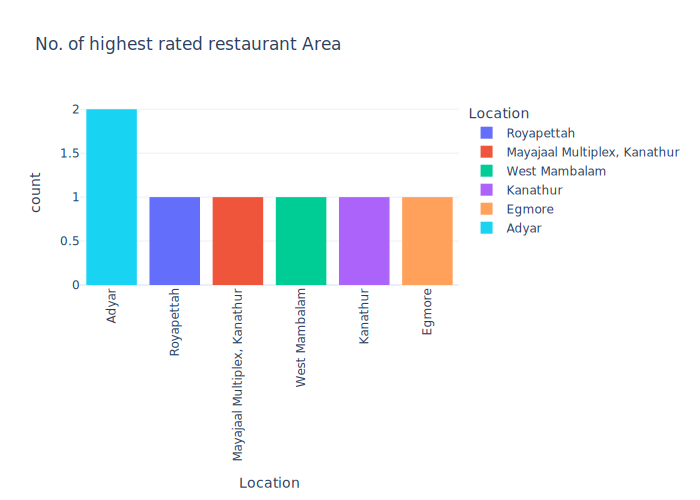

In [24]:
import plotly.express as px

px.histogram(highest_rated_df, x='Location', color='Location', 
             title='No. of highest rated restaurant Area', 
             template='plotly_white').update_xaxes(tickangle=-90, categoryorder='total descending').show()


Q6) What is the Avg Price Distibution of highest rated restaurant for Cuisine in Chennai?

In [25]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'Cuisine'])['Price for 2'].mean().reset_index()
highest_rated_price_df.head()

,Location,Cuisine,Price for 2
0,Adyar,['Ice Cream'],200.0
1,Adyar,['South Indian'],500.0
2,Egmore,"['Kebab', ' Rolls', ' Mughlai']",450.0
3,Kanathur,"['Italian', ' Continental', ' Burger', ' Sandw...",1500.0
4,"Mayajaal Multiplex, Kanathur",['North Indian'],800.0


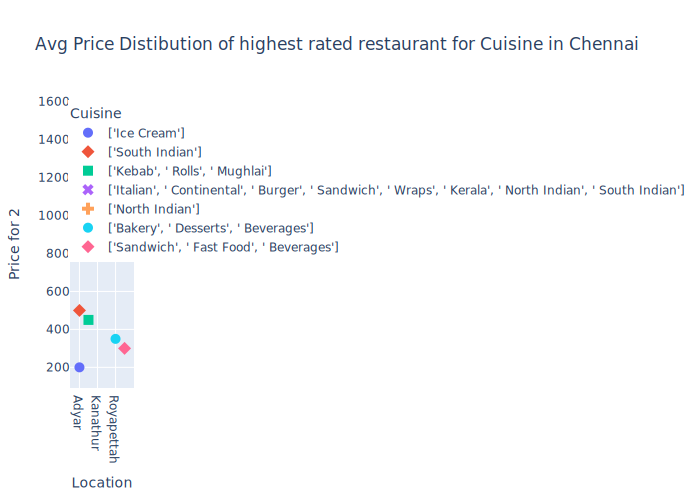

In [26]:
fig = px.scatter(highest_rated_price_df, x="Location", y="Price for 2", color="Cuisine", symbol="Cuisine",
     title='Avg Price Distibution of highest rated restaurant for Cuisine  in Chennai').update_traces(marker_size=10)
fig.show()


Q7) Which regions have the highest number of the best foods of the Chinese restaurant market?

In [27]:
chinese_best_foods_df = zomato_df[zomato_df['Top Dishes'].str.contains('Chinese')]
chinese_best_foods_df

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
1056,U & Me Yummy,"90, Audiappa Naicken Street, Sowcarpet, Chennai",Sowcarpet,"['South Indian', ' North Indian', ' Chinese', ...","['Pav Bhaji', ' Pasta', ' Tawa Pulav', ' Garli...",300.0,3.9,173.0,3.9,173.0,"['Breakfast', 'Home Delivery', 'Indoor Seating']"
1086,Dosart,"11 A, Ormes Road, Kilpauk, Chennai",Kilpauk,"['Chinese', ' North Indian', ' Fast Food']","['Pasta', ' Pizza Dosa', ' Pav Bhaji', ' Schez...",300.0,3.8,168.0,3.3,168.0,"['Home Delivery', 'Indoor Seating']"
9019,Shree Mithai,"5, Besant Avenue Road, Adyar, Chennai",Adyar,"['Mithai', ' Street Food', ' Fast Food']","['Chaat', ' Chole Bhature', ' Sandwich', ' Far...",300.0,4.1,198.0,4.3,198.0,"['Home Delivery', 'Vegetarian Only', 'Indoor S..."
9364,Flower Drum,"1063, Ground Munusamy Salai, KK Nagar, Chennai",K.K. Nagar,"['Chinese', ' Thai']","['Corn Cornet', ' Fried Rice', ' Manchow Soup'...",700.0,4.0,174.0,4.1,174.0,"['Home Delivery', 'Free Parking', 'Indoor Seat..."


In [28]:
chinese_rest_df = chinese_best_foods_df.groupby(by='Location').agg({'Name of Restaurant' : 'count', 'Price for 2' : 'mean'}).rename(columns= {'Name of Restaurant' : 'COUNT OF RESTAURANTS'})
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)
chinese_rest_df.head()


,COUNT OF RESTAURANTS,Price for 2
Location,,
Adyar,1,300.0
K.K. Nagar,1,700.0
Kilpauk,1,300.0
Sowcarpet,1,300.0


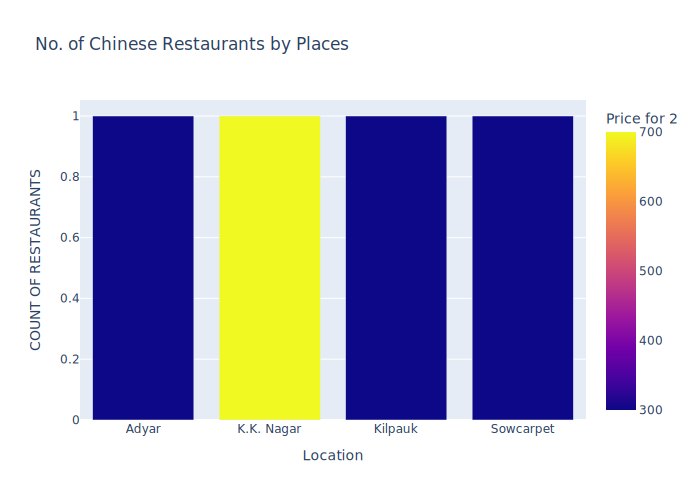

In [29]:
chinese_rest_df = chinese_rest_df.reset_index()

fig = px.bar(chinese_rest_df,  x='Location',  y='COUNT OF RESTAURANTS', color='Price for 2',   title='No. of Chinese Restaurants by Places')

fig.show()


Q8)Which areas have a large number of Chinese Restaurant Market?

In [30]:
chinese_Cuisine_df = zomato_df[zomato_df['Cuisine'].str.contains('Chinese')]
chinese_Cuisine_df

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361.0,4.4,1361.0,"['Home Delivery', 'Indoor Seating']"
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617.0,4.1,617.0,"['Home Delivery', 'Indoor Seating']"
5,Dine N Fun,"Opposite Forest Office, Tambaram Main Road, S...",Medavakkam,"['South Indian', ' North Indian', ' Chinese']","['Chicken Grill', ' Shawarma', ' Naan', ' Chic...",450.0,4.1,567.0,3.8,567.0,"['Home Delivery', 'Indoor Seating']"
8,Savoury Sea Shell,"3, E Block, 3rd Avenue, Anna Nagar East, Chennai",Anna Nagar,"['Arabian', ' Chinese', ' North Indian', ' Leb...","['Shawarma', ' Chicken Grill', ' Brownie', ' S...",1400.0,4.2,2564.0,4.1,2564.0,"['Home Delivery', 'Indoor Seating', 'Card Upon..."
9,Sangeetha Veg Restaurant,"102/82, GN Chetty Road, T. Nagar, Chennai",T. Nagar,"['South Indian', ' North Indian', ' Chinese', ...","['Filtered Coffee', ' Chaat', ' Faluda', ' Mas...",800.0,4.4,1578.0,4.2,1578.0,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."
...,...,...,...,...,...,...,...,...,...,...,...
11382,Texas Treat,"1/191, Velachery Main Road, Santhoshapuram, S...",Selaiyur,"['Bakery', ' North Indian', ' Chinese', ' Ital...",Invalid,850.0,3.8,9.0,3.8,9.0,"['Home Delivery', 'Vegetarian Only', 'Free Par..."
11544,Anandhi Idly Kadai,"5, Mpn Complex, Pillaiyar Koil Street, Medava...",Medavakkam,"['South Indian', ' Chinese']",Invalid,200.0,3.4,24.0,4.1,24.0,"['Home Delivery', 'Indoor Seating']"
11545,Anandhi Idly Kadai,"202, Velachery, Main Road, Camp Road, Junctio...",Selaiyur,"['South Indian', ' Chinese']",Invalid,200.0,3.1,17.0,4.1,17.0,"['Breakfast', 'Home Delivery', 'Indoor Seating']"
11736,Adyar Vaishnavas Thattu Idly Kadai,"3/103, Mugalivakkam Main Road, Madanandapuram...",Porur,"['South Indian', ' Sandwich', ' Chinese', ' St...",Invalid,200.0,3.2,6.0,3.9,6.0,"['Home Delivery', 'Indoor Seating']"


In [31]:
chinese_Rest_df = chinese_Cuisine_df.groupby(by='Location').agg({'Name of Restaurant' : 'count', 'Price for 2' : 'mean'}).rename(columns= {'Name of Restaurant' : 'COUNT OF RESTAURANTS'})
chinese_Rest_df = chinese_Rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).head(25)
chinese_Rest_df.head()


,COUNT OF RESTAURANTS,Price for 2
Location,,
Anna Nagar,95,585.789474
Porur,58,490.517241
Ambattur,52,415.384615
T. Nagar,47,501.063830
Velachery,46,576.086957


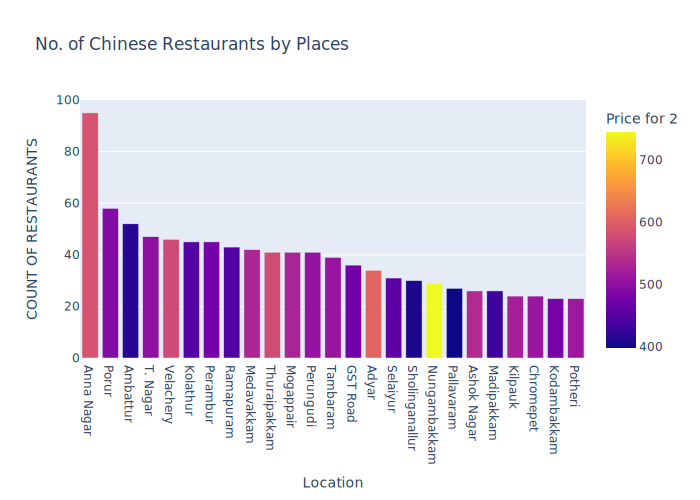

In [32]:
chinese_Rest_df = chinese_Rest_df.reset_index()

fig = px.bar(chinese_Rest_df,  x='Location',  y='COUNT OF RESTAURANTS', color='Price for 2',   title='No. of Chinese Restaurants by Places')

fig.show()


#Q9) Is there a relation between Location and Price?

In [33]:
region_price_df = zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index()
region_price_df

,Location,Price for 2
0,Abhiramapuram,200.000000
1,Adambakkam,327.631579
2,Adyar,528.865979
3,Akkarai,575.000000
4,Alandur,442.857143
...,...,...
155,Vepery,347.368421
156,Vettuvankeni,475.000000
157,Virugambakkam,422.000000
158,Washermenpet,380.555556


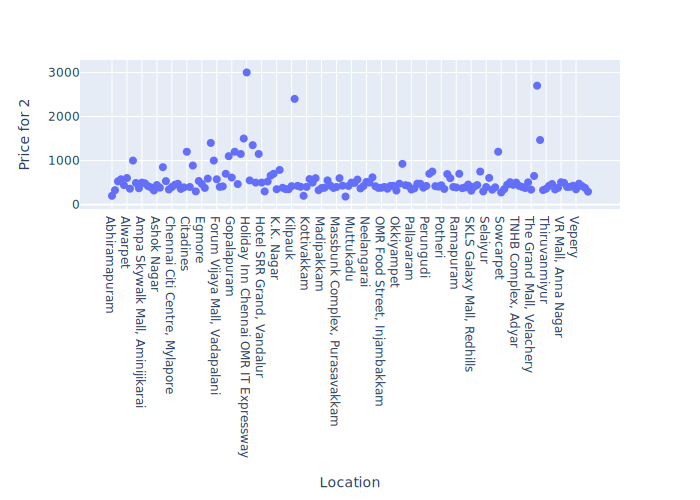

In [34]:
fig = px.scatter(region_price_df, x="Location", y="Price for 2").update_traces(marker_size=8)
fig.show()


Q10) Find the list of Affordable Restaurants?
The criteria for Affordable Restaurants would be:-
1) Low Price 2) High Rated
First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
Let me explain:-The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the
restaurants that are 1/4th of 6000.

In [35]:
max_price = zomato_df['Price for 2'].max()
one_fourth_price = max_price/4
one_fourth_price


np.float64(750.0)

In [36]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
aff_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Top Dishes']]
aff_rest_df = aff_rest_df[aff_rest_df['Price for 2'] <= 1250]
aff_rest_df.sort_values(by='Price for 2', inplace=True)
aff_rest_df


,Name of Restaurant,Price for 2,Cuisine,Location,Top Dishes
1326,Madurai Famous Jigarthanda,100.0,"['Beverages', ' Ice Cream']",T. Nagar,Invalid
2820,Devasahayam Pillai Enterprises,100.0,['South Indian'],Adyar,Invalid
3542,Vijayarams Coffee,100.0,"['Cafe', ' Bakery', ' Juices', ' North Indian'...",T. Nagar,Invalid
11043,Kulfi Treat,100.0,"['Desserts', ' Ice Cream', ' Beverages']",T. Nagar,Invalid
3957,The Sandwich And Shakes,100.0,"['Sandwich', ' Fast Food', ' Beverages']",Sholinganallur,Invalid
...,...,...,...,...,...
241,Sigree Global Grill,1200.0,"['North Indian', ' Kebab', ' Biryani']","The Spring Hotel, Nungambakkam","['Pasta', ' Pizza', ' Fish', ' Jalebi', ' Chaa..."
238,Pakwan Chennai,1200.0,"['North Indian', ' Chinese', ' Italian']",T. Nagar,"['Paneer Tikka', ' Mocktails', ' Lassi', ' Rab..."
174,Delhi Highway,1200.0,"['North Indian', ' Street Food']",Nungambakkam,"['Lassi', ' Thali', ' Dal Makhani', ' Naan', '..."
382,Wok Monk,1200.0,"['Asian', ' Chinese', ' Middle Eastern']",Anna Nagar,"['Dumplings', ' Chocolate Tsunami', ' Pizza', ..."


In [37]:
# Finding the highest rated list of restaurants
highrate_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Dining Rating','Top Dishes','Location',]]
highrate_rest_df = highrate_rest_df[highrate_rest_df['Dining Rating'] >= 4.5]
highrate_rest_df.sort_values(by='Price for 2', inplace=True)
highrate_rest_df


,Name of Restaurant,Price for 2,Cuisine,Dining Rating,Top Dishes,Location
108,Rayar's Mess,100.0,['South Indian'],4.7,"['Pongal', ' Vada', ' Filtered Coffee', ' Idli...",Mylapore
178,Royal Sandwich Shop,150.0,"['Fast Food', ' Desserts', ' Beverages']",4.7,"['Brownie', ' Cheese Masala Toast', ' Chocolat...",Alwarpet
9541,Bombay Kulfi,200.0,['Ice Cream'],4.6,"['Calcutta Paan', ' Tender Coconut Kulfi', ' P...",Anna Nagar
320,Bombay Kulfi,200.0,['Ice Cream'],4.9,"['Kesar Pista Kulfi', ' Malai Kulfi', ' Chocol...",Adyar
50,Andhikkadai,200.0,['South Indian'],4.6,"['Coffee', ' Sweet Kozhukattai', ' Idli', ' Po...",Velachery
24,Eating Circles,250.0,['South Indian'],4.7,"['Rose Milk', ' Neer Dosa', ' Thatte Idli', ' ...",Alwarpet
37,Shree Mithai,300.0,"['Mithai', ' Street Food', ' Fast Food']",4.6,"['Chaat', ' Badam Milk', ' Pav Bhaji', ' Panip...",Chetpet
270,ID,300.0,['South Indian'],4.5,"['Filtered Coffee', ' Appam', ' Buttermilk', '...","Sathyam Cinemas Complex, Royapettah"
155,The Sandwich Shop,300.0,"['Sandwich', ' Fast Food', ' Beverages']",4.9,"['Mocktails', ' Fries', ' Pizza Sandwich', ' T...",West Mambalam
209,Cream Stone,350.0,"['Desserts', ' Ice Cream']",4.5,"['Death By Chocolate', ' Ferrero Rocher', ' Wa...",Alwarpet


Now, we'll merge the aff_rest_df with highrate_rest_df to obtain the intersection i.e the list of Affordable Restaurants !!


In [38]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['Name of Restaurant', 'Location'])
highrate_aff_df = highrate_aff_df[['Name of Restaurant', 'Price for 2_x', 'Cuisine_x', 'Location', 'Top Dishes_x']]
highrate_aff_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine_x': 'Cuisine' ,
                                'Location':'Location', 'Top Dishes_x':'Top Dishes'},inplace=True)




In [39]:
# Affordable Restaurants with low price and high rating
highrate_aff_df

,Name of Restaurant,Price for 2,Cuisine,Location,Top Dishes
0,Rayar's Mess,100.0,['South Indian'],Mylapore,"['Pongal', ' Vada', ' Filtered Coffee', ' Idli..."
1,Royal Sandwich Shop,150.0,"['Fast Food', ' Desserts', ' Beverages']",Alwarpet,Invalid
2,Royal Sandwich Shop,150.0,"['Fast Food', ' Desserts', ' Beverages']",Alwarpet,"['Brownie', ' Cheese Masala Toast', ' Chocolat..."
3,Royal Sandwich Shop,150.0,"['Fast Food', ' Desserts', ' Beverages']",Alwarpet,Invalid
4,Bombay Kulfi,200.0,['Ice Cream'],Anna Nagar,"['Calcutta Paan', ' Tender Coconut Kulfi', ' P..."
5,Bombay Kulfi,200.0,['Ice Cream'],Adyar,"['Kesar Pista Kulfi', ' Malai Kulfi', ' Chocol..."
6,Andhikkadai,200.0,['South Indian'],Velachery,"['Coffee', ' Sweet Kozhukattai', ' Idli', ' Po..."
7,Eating Circles,250.0,['South Indian'],Alwarpet,"['Rose Milk', ' Neer Dosa', ' Thatte Idli', ' ..."
8,ID,300.0,['South Indian'],"Sathyam Cinemas Complex, Royapettah","['Filtered Coffee', ' Appam', ' Buttermilk', '..."
9,The Sandwich Shop,300.0,"['Sandwich', ' Fast Food', ' Beverages']",West Mambalam,"['Mocktails', ' Fries', ' Pizza Sandwich', ' T..."


Q10) Find the list of most Reliable Restaurants?
The criteria for most Reliable Restaurants would be:-
1) Low Price 2) High Rated 3) Large No. of Dining Rating Count and Delivery Rating Count
First step will be to find the restaurants with Dining Rating Count greater than Mean of Count 

In [40]:
mean_DR_Count = zomato_df['Dining Rating Count'].mean()
mean_DR_Count

np.float64(168.96051129879024)

In [41]:
# Finding list of restaurants that have Votes greater than and equal to Mean of Vote
mean_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Top Dishes', 'Dining Rating Count']]
mean_rest_df = mean_rest_df[mean_rest_df['Dining Rating Count'] > 177]
mean_rest_df.sort_values(by='Dining Rating Count', inplace=True)
mean_rest_df

,Name of Restaurant,Price for 2,Cuisine,Location,Top Dishes,Dining Rating Count
9053,A2B - Adyar Ananda Bhavan,300.0,"['Mithai', ' Street Food', ' Fast Food', ' Ice...",Perambur,"['Naan', ' Panneer Butter Masala', ' Coffee', ...",178.0
9394,The Cascade,1000.0,"['Seafood', ' Chinese', ' Asian', ' Thai', ' M...",Mogappair,"['Momos', ' Tempura Prawns', ' Chicken Lollipo...",179.0
9563,The Noodle Theory,400.0,"['Chinese', ' Fast Food']",Adyar,"['Noodle', ' Momos', ' Brownie', ' Clear Soup'...",179.0
10013,Namma Veedu Vasanta Bhavan,600.0,"['Chinese', ' South Indian', ' North Indian']",Maduravoyal,"['Vada', ' Roti', ' Curd Rice', ' Pongal', ' C...",179.0
8781,SS Hyderabad Biryani,500.0,"['Biryani', ' North Indian', ' Chinese', ' Ara...",Washermenpet,Invalid,179.0
...,...,...,...,...,...,...
9040,Palmshore,1000.0,"['North Indian', ' Chinese', ' Arabian', ' BBQ...",Ashok Nagar,"['Fish', ' Faluda', ' Prawn', ' Brownie', ' El...",4478.0
9038,Palmshore,1000.0,"['North Indian', ' Chinese', ' Arabian', ' BBQ...",Ramapuram,"['Fish', ' Brownie', ' Faluda', ' Murgh Platte...",4805.0
9026,Copper Kitchen,1000.0,"['North Indian', ' Chinese', ' Chettinad', ' S...",Porur,"['Faluda', ' Bbq Chicken', ' Brownie', ' Birya...",5073.0
9030,Paradise Biryani,800.0,"['Biryani', ' North Indian', ' Chinese']",Perungudi,"['Hyderabadi Biryani', ' Mutton Biryani', ' Mu...",5317.0


In [42]:
mean_DlR_Count = zomato_df['Delivery Rating Count'].mean()
mean_DlR_Count

np.float64(168.96051129879024)

In [44]:
# Finding list of restaurants that have Votes greater than and equal to Mean of Vote
mean_rest_df = zomato_df[['Name of Restaurant', 'Price for 2', 'Cuisine', 'Location', 'Top Dishes', 'Delivery Rating Count']]
mean_rest_df = mean_rest_df[mean_rest_df['Delivery Rating Count'] > 177]
mean_rest_df.sort_values(by='Delivery Rating Count', inplace=True)
mean_rest_df

,Name of Restaurant,Price for 2,Cuisine,Location,Top Dishes,Delivery Rating Count
9053,A2B - Adyar Ananda Bhavan,300.0,"['Mithai', ' Street Food', ' Fast Food', ' Ice...",Perambur,"['Naan', ' Panneer Butter Masala', ' Coffee', ...",178.0
9394,The Cascade,1000.0,"['Seafood', ' Chinese', ' Asian', ' Thai', ' M...",Mogappair,"['Momos', ' Tempura Prawns', ' Chicken Lollipo...",179.0
9563,The Noodle Theory,400.0,"['Chinese', ' Fast Food']",Adyar,"['Noodle', ' Momos', ' Brownie', ' Clear Soup'...",179.0
10013,Namma Veedu Vasanta Bhavan,600.0,"['Chinese', ' South Indian', ' North Indian']",Maduravoyal,"['Vada', ' Roti', ' Curd Rice', ' Pongal', ' C...",179.0
8781,SS Hyderabad Biryani,500.0,"['Biryani', ' North Indian', ' Chinese', ' Ara...",Washermenpet,Invalid,179.0
...,...,...,...,...,...,...
9040,Palmshore,1000.0,"['North Indian', ' Chinese', ' Arabian', ' BBQ...",Ashok Nagar,"['Fish', ' Faluda', ' Prawn', ' Brownie', ' El...",4478.0
9038,Palmshore,1000.0,"['North Indian', ' Chinese', ' Arabian', ' BBQ...",Ramapuram,"['Fish', ' Brownie', ' Faluda', ' Murgh Platte...",4805.0
9026,Copper Kitchen,1000.0,"['North Indian', ' Chinese', ' Chettinad', ' S...",Porur,"['Faluda', ' Bbq Chicken', ' Brownie', ' Birya...",5073.0
9030,Paradise Biryani,800.0,"['Biryani', ' North Indian', ' Chinese']",Perungudi,"['Hyderabadi Biryani', ' Mutton Biryani', ' Mu...",5317.0


These are the most reliable, highest rated and affordable restaurants:-
We obtain this dataframe by simply taking the intersection of highrate_aff_df & mean_rest_df
This dataframe obtained below shows the restaurants whose:
Cost is below 900
Rating is above 4.8
Dining Rating Count are above 178
Delivery Rating Count are above 177

In [45]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['Name of Restaurant', 'Location'])
reliable_rest_df = reliable_rest_df[['Name of Restaurant', 'Location' ,'Cuisine_x', 'Top Dishes_x','Price for 2_x']]
reliable_rest_df.rename(columns={'Name of Restaurant':'Name of Restaurant', 'Price for 2_x':'Price for 2', 'Cuisine_x':'Cuisine','Top Dishes_x':'Top Dishes'},inplace=True)  
reliable_rest_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2
0,Shmoozie's Hand-Crafted Ice Creams,Egmore,"['Ice Cream', ' Desserts']","['Salted Caramel', ' Brownie', ' Bannoffee Pie...",400.0
1,Kuuraku,Vadapalani,['Japanese'],"['Ramen', ' Sushi', ' Tea', ' Yakitori Don', '...",1200.0
2,Bombay Kulfi,Anna Nagar,['Ice Cream'],"['Calcutta Paan', ' Tender Coconut Kulfi', ' P...",200.0
3,Wok Monk,Anna Nagar,"['Asian', ' Chinese', ' Middle Eastern']","['Dumplings', ' Chocolate Tsunami', ' Pizza', ...",1200.0
4,Blind Ch3mistry,Teynampet,"['Cafe', ' Continental', ' Italian', ' Dessert...","['Pasta', ' Cheese Corn Balls', ' Pizza', ' Ch...",700.0
5,Writer's Cafe,Taramani,"['Cafe', ' American']","['Hot Chocolate', ' Pizza', ' Pasta', ' Waffle...",600.0
6,Bombay Kulfi,Adyar,['Ice Cream'],"['Kesar Pista Kulfi', ' Malai Kulfi', ' Chocol...",200.0
7,The Sandwich Shop,West Mambalam,"['Sandwich', ' Fast Food', ' Beverages']","['Mocktails', ' Fries', ' Pizza Sandwich', ' T...",300.0
8,Fruit Shop On Greams Road,Thousand Lights,"['Beverages', ' Fast Food', ' Healthy Food', '...","['Fruit Juices', ' Sandwich', ' Mint Lime Cool...",350.0
9,Flower Drum,Adyar,"['Chinese', ' Thai']","['Momos', ' Noodle', ' Dimsum Platter', ' Sche...",800.0
